In [1]:
import chainladder as cl
from bayesianchainladder import BayesianChainLadderGLM
import arviz as az

# Load a sample triangle
clrd = cl.load_sample("clrd")
triangle = clrd.loc[("New Jersey Manufacturers Grp", "wkcomp"), "CumPaidLoss"]

# Fit the Bayesian chain ladder model
model = BayesianChainLadderGLM(
    formula="incremental ~ 1 + C(origin) + C(dev)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model.fit(triangle)

# Get reserve summary
print(model.summary())

# Access posterior samples
reserve_samples = model.sample_reserves(n_samples=1000)


Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, C(origin), C(dev)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


          Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.663381e+05    285.934409  1.663221e+05    3435.059701   
1990      176346.0  1.845014e+05    454.460021  1.844845e+05    8155.397466   
1991      187266.0  2.023852e+05    688.688421  2.023726e+05   15119.249945   
1992      189506.0  2.122305e+05    959.332791  2.121936e+05   22724.502173   
1993      175475.0  2.073675e+05   1329.947669  2.073445e+05   31892.537252   
1994      159972.0  2.055179e+05   2032.196945  2.054439e+05   45545.857141   
1995      122811.0  1.831580e+05   2870.137812  1.830858e+05   60346.972621   
1996       92242.0  1.733680e+05   4591.298165  1.732548e+05   81126.004420   
1997       43962.0  1.503421e+05   8270.669577  1.499385e+05  106380.140097   
Total    1310483.0  1.685209e+06  11827.521943  1.684662e+06  374725.720817   

                                    
              

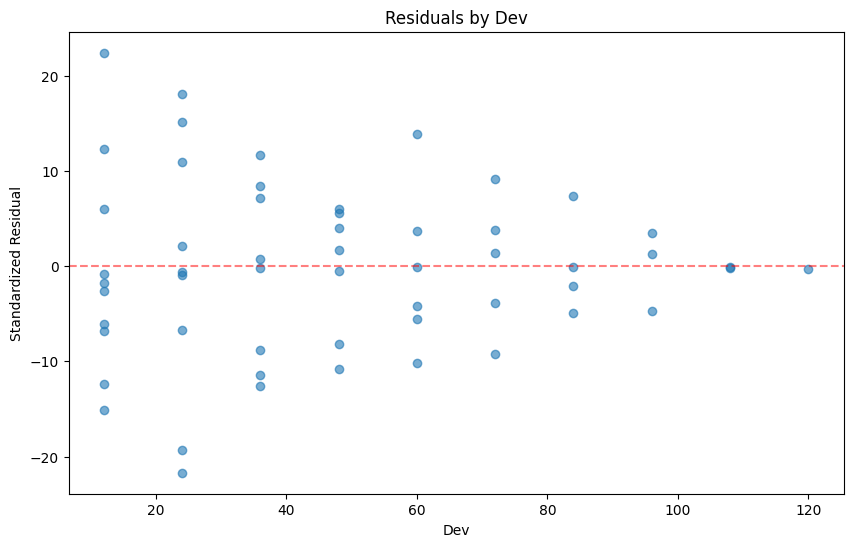

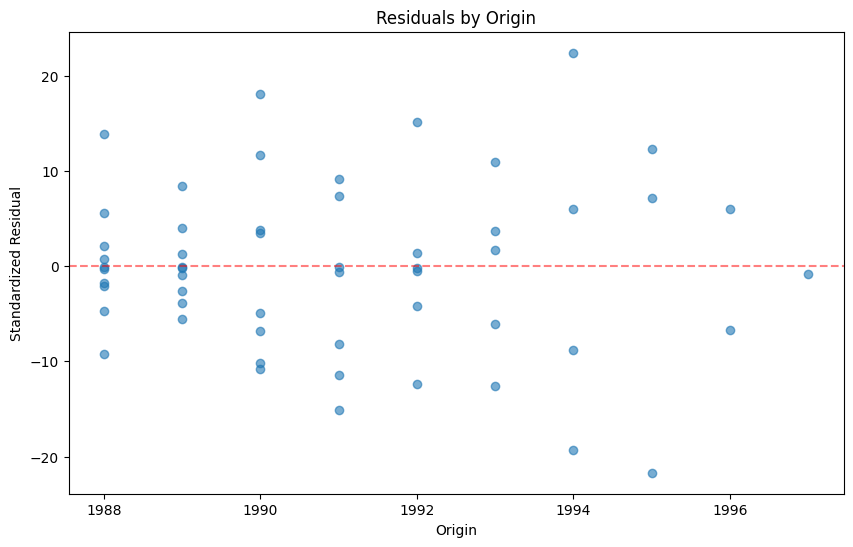

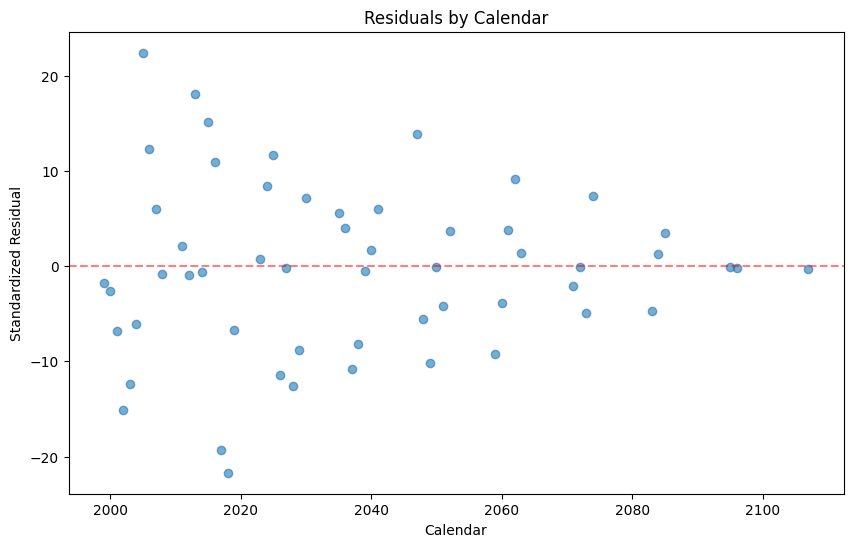

In [2]:
from bayesianchainladder import (
    plot_trace,
    plot_ppc,
    plot_reserve_distribution,
    plot_residuals,
    plot_heatmap_residuals,
    plot_development_pattern
)

fig, ax = plot_residuals(model, by="dev")
fig, ax = plot_residuals(model, by="origin")
fig, ax = plot_residuals(model, by="calendar")

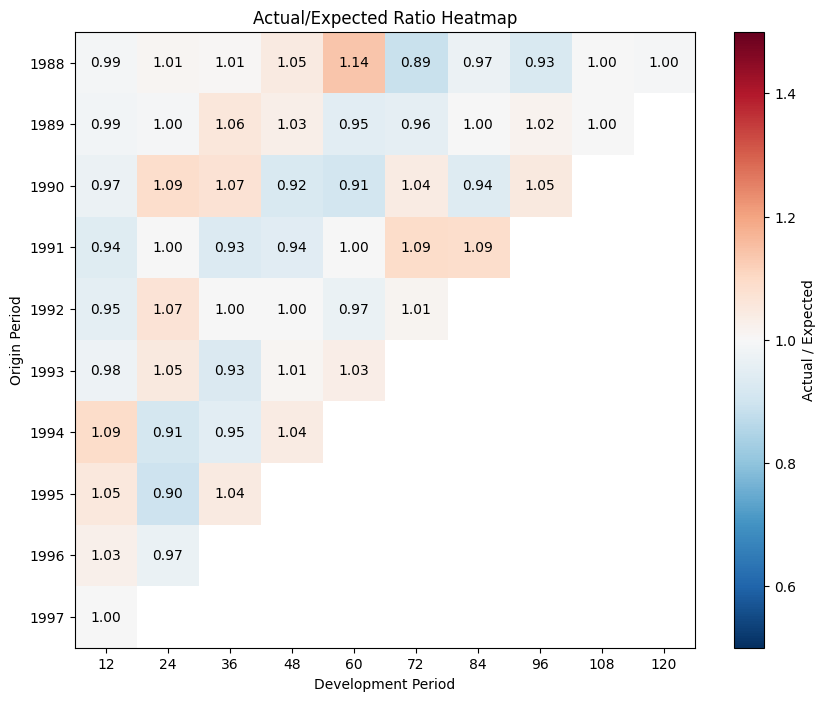

In [3]:
fig, ax = plot_heatmap_residuals(model)

In [4]:
model.ibnr_

,mean,std,median,5%,25%,75%,95%
origin,,,,,,,
1989,3435.059701,285.934409,3419.097463,2995.375649,3238.799626,3610.534068,3925.713057
1990,8155.397466,454.460021,8138.471633,7430.919712,7848.690886,8446.335229,8927.132494
1991,15119.249945,688.688421,15106.598279,14037.283310,14644.747325,15570.709289,16263.704848
1992,22724.502173,959.332791,22687.636368,21185.000081,22078.818863,23352.538254,24342.207168
1993,31892.537252,1329.947669,31869.530979,29795.547094,30972.922032,32744.516066,34135.396128
1994,45545.857141,2032.196945,45471.911430,42312.694159,44184.331013,46848.716699,48970.902403
1995,60346.972621,2870.137812,60274.817071,55782.432448,58383.478382,62182.752870,65154.420557
1996,81126.004420,4591.298165,81012.754251,73786.048964,78057.169451,83962.150848,88937.180612
1997,106380.140097,8270.669577,105976.472350,93386.608853,100733.269454,111745.695086,120575.486239


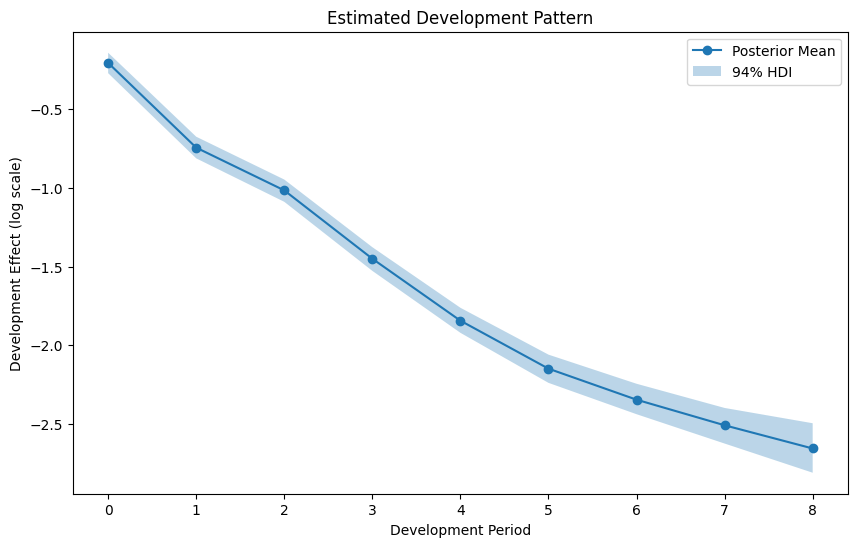

In [5]:
fig, ax = plot_development_pattern(model)

In [6]:
from bayesianchainladder import extract_parameter_summary

extract_parameter_summary(model.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.649,0.036,10.579,10.715,0.001,0.000,2121.0,3520.0,1.0
C(origin)[1989],0.144,0.036,0.077,0.212,0.001,0.000,3624.0,4716.0,1.0
C(origin)[1990],0.240,0.036,0.170,0.309,0.001,0.000,3596.0,5006.0,1.0
C(origin)[1991],0.369,0.039,0.293,0.438,0.001,0.000,3579.0,5223.0,1.0
C(origin)[1992],0.390,0.040,0.313,0.462,0.001,0.000,3774.0,4880.0,1.0
C(origin)[1993],0.368,0.043,0.290,0.450,0.001,0.000,3989.0,4570.0,1.0
C(origin)[1994],0.354,0.047,0.268,0.443,0.001,0.001,4305.0,5331.0,1.0
C(origin)[1995],0.244,0.051,0.145,0.339,0.001,0.001,4133.0,5053.0,1.0
C(origin)[1996],0.186,0.060,0.075,0.303,0.001,0.001,4193.0,5635.0,1.0
C(origin)[1997],0.043,0.081,-0.108,0.194,0.001,0.001,5025.0,5198.0,1.0


In [7]:
# Fit the Bayesian chain ladder model
model_spline = BayesianChainLadderGLM(
    formula="incremental ~ 1 + C(origin) + bs(dev, df=5)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model_spline.fit(triangle)

# Get reserve summary
model_spline.summary()

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, C(origin), bs(dev, df=5)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.665873e+05    321.162024  1.665725e+05    3684.349181   
1990      176346.0  1.845685e+05    527.725021  1.845467e+05    8222.545382   
1991      187266.0  2.021697e+05    774.940855  2.021465e+05   14903.698560   
1992      189506.0  2.122523e+05   1083.396472  2.122218e+05   22746.343206   
1993      175475.0  2.080848e+05   1494.173722  2.080325e+05   32609.810355   
1994      159972.0  2.064184e+05   2252.373631  2.063718e+05   46446.394394   
1995      122811.0  1.814001e+05   3124.715450  1.812878e+05   58589.116150   
1996       92242.0  1.744614e+05   5388.878948  1.742462e+05   82219.431372   
1997       43962.0  1.507377e+05   9584.103965  1.502013e+05  106775.656332   
Total    1310483.0  1.686680e+06  13457.383653  1.686218e+06  376197.344933   

                                    
                std         median  
1989     321.162024    3669.540240  
1990     527.725021    8200.689147  
1991     774.940855   14880.524692  
1992    1083.396472   22715.756427  
1993    1494.173722   32557.488121  
1994    2252.373631   46399.848339  
1995    3124.715450   58476.807676  
1996    5388.878948   82004.222844  
1997    9584.103965  106239.328102  
Total  13457.383653  375735.295876

In [ ]:
# Fit the Bayesian chain ladder model
model_quad = BayesianChainLadderGLM(
    formula="incremental ~ 1 + origin_idx + {origin_idx**2} + C(dev)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model_quad.fit(triangle)

# Get reserve summary
model_quad.summary()

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, origin_idx, I(origin_idx ** 2), C(dev)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 3 seconds.


Ultimate                                                    IBNR  \
      paid_to_date          mean          std        median           mean   
1989      162903.0  1.658738e+05   210.519063  1.658614e+05    2970.766572   
1990      176346.0  1.837902e+05   322.101521  1.837793e+05    7444.177704   
1991      187266.0  2.008232e+05   446.852632  2.008157e+05   13557.245439   
1992      189506.0  2.110878e+05   616.682603  2.110800e+05   21581.802327   
1993      175475.0  2.077371e+05   811.922787  2.077160e+05   32262.142295   
1994      159972.0  2.068556e+05  1068.582481  2.068411e+05   46883.596312   
1995      122811.0  1.897880e+05  1460.038884  1.897660e+05   66976.980910   
1996       92242.0  1.809363e+05  2163.614004  1.808988e+05   88694.312197   
1997       43962.0  1.641629e+05  3790.525303  1.640768e+05  120200.910225   
Total    1310483.0  1.711055e+06  8587.575944  1.710952e+06  400571.933983   

                                   
               std         median  
1989    210.519063    2958.367819  
1990    322.101521    7433.341062  
1991    446.852632   13549.696015  
1992    616.682603   21574.006086  
1993    811.922787   32240.992004  
1994   1068.582481   46869.122586  
1995   1460.038884   66954.959204  
1996   2163.614004   88656.769352  
1997   3790.525303  120114.763081  
Total  8587.575944  400468.559914

In [9]:
extract_parameter_summary(model_quad.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.457,0.038,10.385,10.528,0.001,0.000,3267.0,4350.0,1.0
origin_idx,0.208,0.016,0.179,0.238,0.000,0.000,3357.0,4185.0,1.0
I(origin_idx ** 2),-0.019,0.002,-0.022,-0.016,0.000,0.000,3282.0,4169.0,1.0
C(dev)[24],-0.209,0.032,-0.268,-0.151,0.001,0.000,3221.0,4234.0,1.0
C(dev)[36],-0.750,0.034,-0.813,-0.685,0.001,0.000,3204.0,3904.0,1.0
C(dev)[48],-1.016,0.035,-1.083,-0.950,0.001,0.000,3219.0,4746.0,1.0
C(dev)[60],-1.451,0.037,-1.520,-1.380,0.001,0.000,3378.0,4991.0,1.0
C(dev)[72],-1.841,0.040,-1.915,-1.765,0.001,0.000,3456.0,5009.0,1.0
C(dev)[84],-2.147,0.043,-2.226,-2.063,0.001,0.000,3669.0,5262.0,1.0
C(dev)[96],-2.354,0.049,-2.449,-2.264,0.001,0.001,4406.0,5142.0,1.0


In [14]:
import numpy as np

# Fit the Bayesian chain ladder model
model_quad_dev = BayesianChainLadderGLM(
    formula="incremental ~ 1 + origin_idx + {origin_idx**2} + I(dev_idx - 1) + {np.maximum(0, dev_idx - 7.5)} + {np.where(dev_idx == 2, 1, 0)}",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model_quad_dev.fit(triangle)

# Get reserve summary
model_quad_dev.summary()

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, origin_idx, I(origin_idx ** 2), I(dev_idx - 1), I(np.maximum(0, dev_idx - 7.5)), I(np.where(dev_idx == 2, 1, 0))]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.663197e+05    113.923481  1.663174e+05    3416.702050   
1990      176346.0  1.848030e+05    194.482174  1.848036e+05    8456.998922   
1991      187266.0  2.031310e+05    315.009944  2.031314e+05   15864.981124   
1992      189506.0  2.165127e+05    542.243361  2.165024e+05   27006.658596   
1993      175475.0  2.182854e+05    858.009269  2.182570e+05   42810.412665   
1994      159972.0  2.240072e+05   1234.871277  2.239744e+05   64035.160887   
1995      122811.0  2.138767e+05   1746.929219  2.138487e+05   91065.726263   
1996       92242.0  2.223393e+05   2958.908885  2.222337e+05  130097.256360   
1997       43962.0  2.106827e+05   5144.099424  2.104929e+05  166720.651841   
Total    1310483.0  1.859958e+06  10860.321411  1.859600e+06  549474.548709   

                                    
                std         median  
1989     113.923481    3414.434075  
1990     194.482174    8457.611601  
1991     315.009944   15865.352015  
1992     542.243361   26996.402155  
1993     858.009269   42781.982310  
1994    1234.871277   64002.415463  
1995    1746.929219   91037.696829  
1996    2958.908885  129991.685383  
1997    5144.099424  166530.936855  
Total  10860.321411  549116.577386

In [15]:
extract_parameter_summary(model_quad_dev.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.455,0.040,10.378,10.528,0.001,0.0,4600.0,5043.0,1.0
origin_idx,0.207,0.017,0.178,0.240,0.000,0.0,2891.0,3666.0,1.0
I(origin_idx ** 2),-0.019,0.002,-0.022,-0.015,0.000,0.0,2911.0,4018.0,1.0
I(dev_idx - 1),-0.358,0.006,-0.369,-0.347,0.000,0.0,4996.0,5237.0,1.0
"I(np.maximum(0, dev_idx - 7.5))",0.238,0.030,0.181,0.296,0.000,0.0,5018.0,5480.0,1.0
"I(np.where(dev_idx == 2, 1, 0))",0.152,0.028,0.099,0.204,0.000,0.0,6544.0,5553.0,1.0


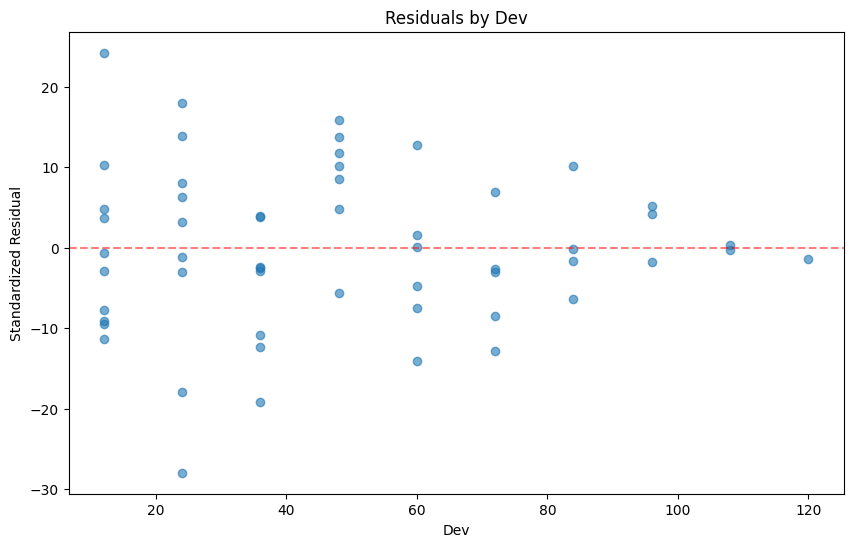

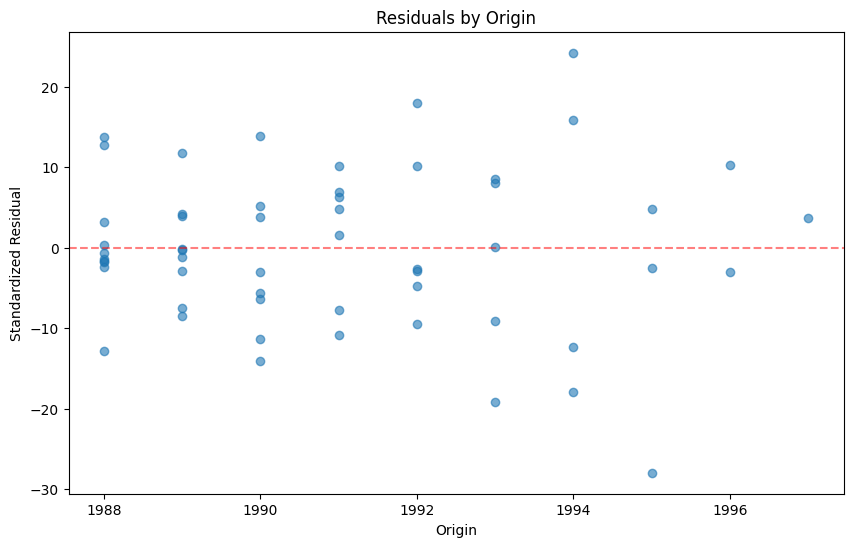

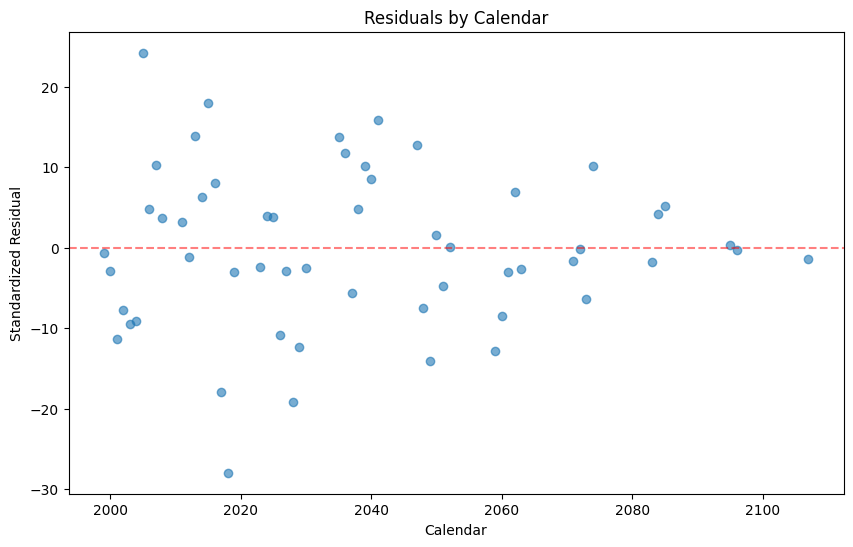

In [16]:
fig, ax = plot_residuals(model_quad_dev, by="dev")
fig, ax = plot_residuals(model_quad_dev, by="origin")
fig, ax = plot_residuals(model_quad_dev, by="calendar")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.646,0.039,10.572,10.719,0.000,0.000,8549.0,6142.0,1.0
"bs(origin, df=5)[0]",0.079,0.078,-0.067,0.226,0.001,0.001,5591.0,5321.0,1.0
"bs(origin, df=5)[1]",0.216,0.074,0.077,0.356,0.001,0.001,5028.0,5495.0,1.0
"bs(origin, df=5)[2]",0.566,0.103,0.372,0.760,0.002,0.001,4457.0,5521.0,1.0
"bs(origin, df=5)[3]",0.222,0.099,0.036,0.407,0.001,0.001,5149.0,5385.0,1.0
"bs(origin, df=5)[4]",0.064,0.083,-0.087,0.230,0.001,0.001,7589.0,5529.0,1.0
"bs(dev, df=5)[0]",0.151,0.077,0.003,0.297,0.001,0.001,6680.0,5597.0,1.0
"bs(dev, df=5)[1]",-0.623,0.074,-0.774,-0.495,0.001,0.001,5875.0,5893.0,1.0
"bs(dev, df=5)[2]",-1.676,0.103,-1.873,-1.483,0.001,0.001,5403.0,5079.0,1.0
"bs(dev, df=5)[3]",-2.646,0.099,-2.832,-2.461,0.001,0.001,6574.0,5691.0,1.0


In [19]:
import arviz as az

az.compare({"Categorical Dev": model.idata, "Spline Dev": model_spline.idata})

/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-r

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Categorical Dev,0,-485.547663,17.224178,0.000000,0.623088,7.457989,0.000000,True,log
Spline Dev,1,-487.322797,10.805200,1.775134,0.376912,7.071362,3.672219,True,log
